# Dimensionality reduction

Dimensionality reduction is about generating $q \leq p$ new variables from $p$ variables of a data set $X \in \mathbb{R}^{n \times p}$. One of the motivations by dimensionality reduction techniques is to present data in a lower dimensional space and lose as little information is possible. The desire for lower dimensional representations (this just means we want a lower amount of variables) is that many statistical models easier trained for lower dimensional data.

We are going to take a look at principal component analysis (PCA) to learn about a popular dimensionality reduction technique. While it only uses linear relationships between variables to create lower dimensional representations of the data, it has nice mathematical properties and is interpretable. Due to the latter, it can be employed for important tasks in the field of financial markets, i.e., creating systematic factors and identifying risk contributors in a portfolio.

The math behind PCA is really interesting and elegant. However, beyond the scope of this course, given the different mathematical background of all students. I attach technical notes to the end of this chapter which are only for interested readers. They are not important for the course's exam.

## Principal Component Analysis

As an introduction to PCA, we focus on its intuition and some important definitions. Given the data matrix $X \in \mathbb{R}^{n \times p}$ whose rows are observations and whose columns are variables, PCA creates up to $p$ vectors $\mathbb{w}_j$. Each of these vectors are called principal components. We assume that $X$ is mean-centered. This means for each value we estimate and subtract the expected value. Furthermore, all principal components are unit vectors, which means they are normalized such that their length is equal to one. In addition, they are independent of each other which means that their dot product is equal to zero. 

PCA is about the variation in the data. As data is mean-centered, the variation in the data is the sum of squared values of $X$, i.e., $TSS = \sum_{i=1}^n \sum_{j=1}^p x_{ij}^2$. The principal components are used to create new variables which capture as much variation of the data as possible. Given a principal component $\mathbf{w}_j \in \mathbb{R}^p$, principal component scores are determined by:

$$
\mathbb{z}_j = X \mathbf{w}_j 
$$

This is also called a *projection*. For each observation $i$ (row) in the data set, the principal component score is determined as a weighted sum of the original observations from all variables. The weights are elements of the principal component vector. 

$$
z_{ij} = x_{i1} w_{1j} + x_{i2} w_{2j} + \cdots + x_{ip} w_{pj}
$$

The ratio of the variance of a principal component to the overall level of variation is given by:

$$
PSS_j = \frac{SS_j}{TSS} = \frac{\sum_{i=1}^n z_{ij}^2}{\sum_{i = 1}^n \sum_{j = 1}^p x_{ij}^2}
$$

Note, understanding variation is understanding when observations deviate from their expected value. Assume, in an extreme example, $PSS_j$ to be a high number, e.g., 80\%. This means if we understand under which scenarios scores from the first principal component deviate to a large extend from their expected value, we understand where a large part of the overall variation comes from. 

Without further explanations, note the following characteristics for PCA. The variance of principal components decreases. Thus, the first principal components usually capture a large ratio of the overall variation in the data. Another helpful information with this respect is to understand that principal components point into different directions of variation in the data. 

Take a look in the scatter plot below which visualizes a data set with two variables. With PCA up to two principal components can be determined. We observe that the values of $x_1$ vary more than the ones of $x_2$. Furthermore, a positive relation seems to exists between both variables. The two arrows represent the vectors of the principal components (scaled by the variance they capture, i.e., longer vector means more variation is captured by this component). You should be able to identify that the longer vector is along the axis of the highest level of variation. The second vector has a 90 degree angle to the first vector (this is due to their orthogonality) and heads into the other direction of variation in the data.

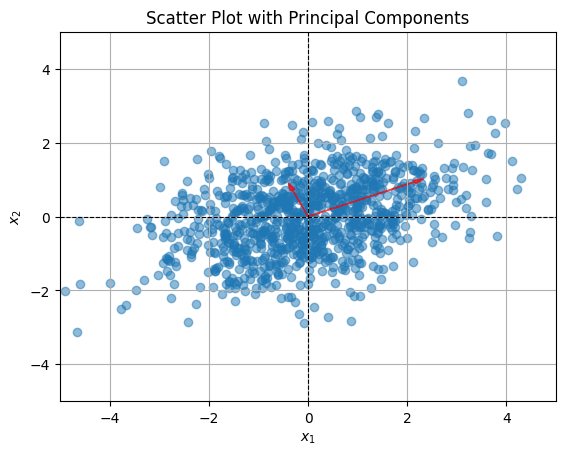

In [34]:
import numpy as np
import matplotlib.pyplot as plt

mean = [0, 0]
covariance = [[2, .5], [.5, 1]]
X = np.random.multivariate_normal(mean, covariance, 1000)
covariance_hat = 1/(X.shape[0]-1) * X.T.dot(X)

eigenvalues, eigenvectors = np.linalg.eig(covariance_hat)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Scatter Points")

for vector, scale in zip(eigenvectors.T, eigenvalues):
    plt.arrow(0, 0, vector[0] * scale, vector[1] * scale, 
                head_width=0.1, head_length=0.2, fc='red', ec='red', alpha=0.7)

# Enhance plot aesthetics
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Scatter Plot with Principal Components")
plt.xlabel(f"$x_1$")
plt.ylabel(f"$x_2$")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.show()

Variation in the data stems from the individual variance of each variable and their relationship. Given the relationship is linear, its strength can be quantified by covariance. If we take a look at the covariance matrix from the data above:

In [40]:
print(covariance_hat.round(4))

[[2.0962 0.5726]
 [0.5726 1.0331]]


we observe that the variance of $x_1$ is about twice as much as the one from $x_2$. In addition, the overall variation is increased by a positive covariance. If we take a look at the first principal component:

In [43]:
print(eigenvectors[:, 0].round(4))

[0.9166 0.3998]


we observe that the weight for $x_1$ is higher than for $x_2$. In this example, the first principle component scores are calculated by:

$$
z_{i1} = x_{i1} w_{11} + x_{i2} w_{21} = 0.9166 x_{i1}  + 0.3998 x_{i2} 
$$

You can see, the variable with a higher level of variation ($x_1$) gets a higher weight, such that $z_{i1}$ also varies to a large extent. If we take a look the second principal component:

In [45]:
print(eigenvectors[:, 1].round(4))

[-0.3998  0.9166]


we observe a smaller weight for $x_1$. Furthermore, the signs are different which offsets variation from the two variables with a positive linear relationship. Visualizing the variation of the scores for the first and the second principal component, we clearly can see that the first principal component varies to a larger extent. 

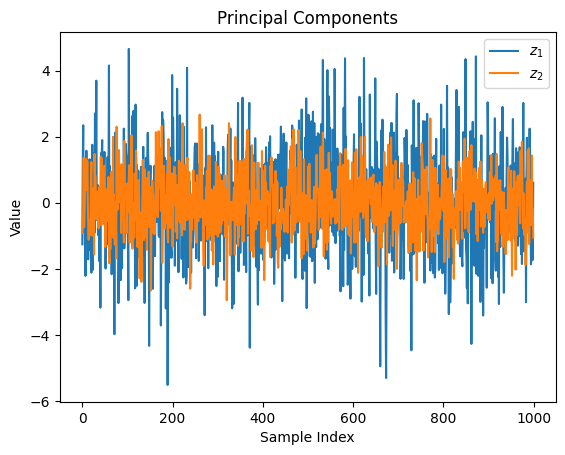

In [50]:
z1 = X.dot(eigenvectors[:, 0])
z2 = X.dot(eigenvectors[:, 1])

plt.plot(z1, label=r"$z_1$")
plt.plot(z2, label=r"$z_2$")
plt.title("Principal Components")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()

$PSS_1 = 0.75$ which tells us that 75\% from the overall variation in the data is captured by the first principal component. Furthermore, as both weights from the first principal component are positive, we know that if the score for the first principal component is positive, that the observations of $x_1, x_2$ likely have the same sign. This can not said with certainty, however, the latter sentence highlights a characteristic of dimensionality reduction. From the lower representation, we can say something about the original data without knowing the original data. Not with certainty, however, on average we should be write with such an inference. 

Another characteristic for dimensionality techniques is that the characteristics in the lower dimension are as close as possible as in the original dimension. For instance, we can determine how (dis-)similar observations are in the two dimensional space. For our example, we quantify this by the euclidean distance. If we determine the distances between three random observations by pairs of $(x_{i1}, x_{i2})$ or $z_{i1}$, respectively, we observe below that the relationship of similarity remains the same. In this example, observations 1 and 20 are more similar to each other than 1 and 200. This is true if we determine the euclidean distance in two dimensions as well as in one dimension which is represented by the first principal component.

In [76]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

ecl_dist = euclidean_distances(X)
print("Distance between the first and 20th samples:")
print(np.round(ecl_dist[0, 19], 2))
print("Distance between the first and 200th samples:")
print(np.round(ecl_dist[0, 199], 2))

print("Distance between the first and 20th samples of the first principal component score:")
print(np.round(np.sqrt((z1[0] - z1[19])**2), 2))
print("Distance between the first and 200th samples of the first principal component score:")
print(np.round(np.sqrt((z1[0] - z1[199])**2), 2))


Distance between the first and 20th samples:
1.96
Distance between the first and 200th samples:
5.29
Distance between the first and 20th samples of the first principal component score:
1.04
Distance between the first and 200th samples of the first principal component score:
5.12


## Principal components of financial returns

So far, we have taken a look at PCA in an abstract way. However, let us approach the topic with financial data and find out, that these concepts can become more intuitive than you might think right now. In the cell below, we import daily returns (in \%) from the year 2024 for Apple (AAPL), Alphabet (GOOGL), JP Morgan (JPM), Morgan Stanley (MS) and Microsoft (MSFT).

In [20]:
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "MSFT", "GOOGL", "JPM", "MS"]

try:
    data = pd.read_csv("../data/aapl_msft_googl_jpm_ms.csv", index_col=0)
    data.index = pd.to_datetime(data.index)
except:
    data = yf.download(tickers, start="2024-01-01", end="2024-12-31")["Adj Close"]
    data.to_csv("../data/aapl_msft_googl_jpm_ms.csv")

r_t = data.pct_change().dropna().multiply(100)
r_t.head()

,AAPL,GOOGL,JPM,MS,MSFT
Date,,,,,
2024-01-03,-0.748762,0.542804,-0.435847,-2.119281,-0.072800
2024-01-04,-1.270009,-1.821190,0.663608,0.261127,-0.717762
2024-01-05,-0.401297,-0.483901,0.501722,1.182850,-0.051638
2024-01-08,2.417483,2.291305,-0.145125,0.289586,1.887162
2024-01-09,-0.226342,1.519752,-0.790605,-1.550653,0.293577


In the next cell, we take a look at the covariance matrix. Values on the diagonal are estimated variances for each company, the values in the lower and upper triangular matrix correspond to pairwise covariances. We observe that Alphabet has the highest variance after Morgan Stanley. Taking a look at off-diagonal values, we observe pairwise positive covariance for each pair of companies. The latter is typical for stock market returns.  

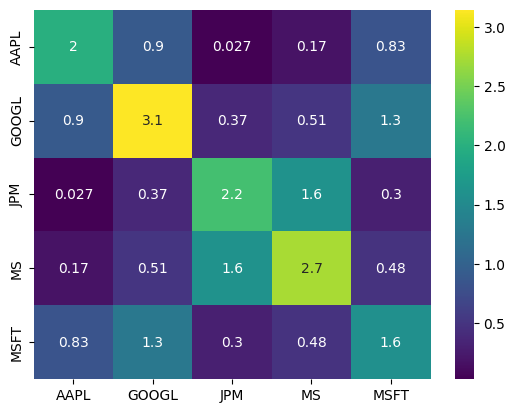

In [21]:
from utils import PcaPortfolio

pca_portfolio = PcaPortfolio(r_t, standardize=False)
pca_portfolio.fit()
pca_portfolio.plot_covariance_matrix()

The next cell exhibits the principal components. Most important are the first components as they capture the vast majority of variation in the data. In this context, variation relates to variance which is one of the most important dimensions to measure risk on financial markets. From the visualization of the previous subchapter, we know that the each component represents a vector. The vector of the first component points in the direction of the highest level of variation in the data. The higher the weight of each company, the more the vector is oriented along the variation of the individual company. If the returns of all companies would be independent, the first component would be a vector of zeros except for the company with the highest variance. Given the positive relationship for all company pairs, the companies with the highest individual variance and highest covariances get the highest weights. 

When we take a look at the first component below, we identify Alphabet to be the company with the highest weight, followed by Morgan Stanley. Furthermore, we observe that all weights have the same sign. Two data driven insights can be drawn from this. (1) Alphabet and Morgan Stanley contribute most to the variation in the data. (2) Positive realizations from the first principal component correspond to days where the majority of all companies have a positive return, while the opposite is true if the score of the first principal component is negative.

In [22]:
pca_portfolio.components_to_df()

,Component 1,Component 2,Component 3,Component 4,Component 5
AAPL,0.307198,-0.351721,-0.808052,0.176444,-0.312794
GOOGL,0.596108,-0.470881,0.566225,0.059440,-0.314295
JPM,0.392371,0.519710,0.025992,0.742899,0.152879
MS,0.495110,0.568215,-0.106985,-0.609917,-0.220347
MSFT,0.388839,-0.248185,-0.119660,-0.203559,0.855250


Let us verify these statements. Assume we hold an equally weighted portfolio of all five companies over the whole time period. This means we invest 20\% of our funds into every company. The daily portfolio return is given by:

$$
r_{t, pf} = \sum_{j=1}^5 \frac{1}{5} r_{tj}
$$

with $r_{tj}$ being the return of company $j$ on day $t$. In the cell below, we identify the top ten days with the highest deviation from the average portfolio return. I.e., the ten days in the observation period with the highest values for $\left(r_{t, pf} - \bar{r}_{t, pf}\right)^2$.

In [23]:
r_pf = r_t.mean(axis = 1)
top_variance_pf_days = r_pf.subtract(r_pf.mean()).apply(lambda x: x**2).sort_values(ascending=False).index[:10]
r_pf[top_variance_pf_days].apply(lambda x: x**2)

Date
2024-11-06    33.495151
2024-08-05    13.840441
2024-12-18    13.086517
2024-09-03     8.342470
2024-08-02     7.650406
2024-07-24     7.623380
2024-01-31     7.450695
2024-09-06     5.492179
2024-10-31     5.327111
2024-04-26     5.813151
dtype: float64

Now let us find out which companies contribute most to these deviations. Below, we examine the individual values $\left(r_{t, j} - \bar{r}_{t, j}\right)^2$ at these days.

In [24]:
r_t_mc = r_t.subtract(r_t.mean())
r_t_mc.loc[top_variance_pf_days].apply(lambda x: x**2).round(4)

,AAPL,GOOGL,JPM,MS,MSFT
Date,,,,,
2024-11-06,0.2181,14.7269,129.6979,131.4107,4.1993
2024-08-05,24.5725,21.1329,5.2221,16.7456,11.1271
2024-12-18,5.2100,14.0111,12.3068,29.0898,14.6394
2024-09-03,8.1847,14.7114,4.6562,18.8118,3.6709
2024-08-02,0.2987,6.5122,19.3358,35.4770,4.5653
2024-07-24,9.0951,26.9326,0.9669,2.6463,13.3629
2024-01-31,4.3103,58.5410,1.5366,0.3389,7.6435
2024-09-06,0.7087,17.3907,6.4092,9.8069,2.9179
2024-10-31,3.8468,4.2894,1.6018,0.6166,37.4888


To summarize the contribution over these days, we sum all squared deviations from the mean over the ten days. It turns out, the the order of risk contribution on days at which the portfolio experiences the highest variation is in line with the weights of the first principal component. Thus, these weights may be used as a identification of the highest risk contributing companies in a portfolio.

In [25]:
r_t_mc.loc[top_variance_pf_days].apply(lambda x: x**2).sum().round(4)

AAPL      56.6828
GOOGL    279.7236
JPM      181.7421
MS       244.9642
MSFT     102.6928
dtype: float64

The first principal component is often used as a systematic risk factor for the companies in the data set. The weights all have the sign. Applying the notation for returns, the first principal component scores of the first component are derived by:

$$
z_{t1} = r_{t1} w_{11} + r_{t2} w_{21} + ... + r_{t5} w_{51}
$$

In our example all weights are positive, this means if the majority of the five companies exhibits a positive return $z_{t1} > 0$ and $z_{t1} < 0$ on days at which the majority of the companies exhibit a negative return. The cell below exhibits the return observations for the ten days with the lowest values of the first principal component. As we can see these are days on which adverse value developments occur systematically among all companies.

In [26]:
Z = pca_portfolio.transform(r_t_mc)
r_t.loc[Z.iloc[:, 0].sort_values().index[:10]]

,AAPL,GOOGL,JPM,MS,MSFT
Date,,,,,
2024-08-05,-4.816695,-4.446178,-2.129154,-3.943665,-3.265681
2024-12-18,-2.142178,-3.592265,-3.352075,-5.245027,-3.756101
2024-01-31,-1.935758,-7.500331,-1.083563,-0.433694,-2.694635
2024-09-03,-2.720527,-3.684663,-2.001781,-4.188791,-1.845906
2024-08-02,0.686936,-2.401028,-4.241208,-5.807783,-2.066601
2024-07-24,-2.875433,-5.038782,-0.827278,-1.478259,-3.585483
2024-09-06,-0.701496,-4.019342,-2.375595,-2.983125,-1.638141
2024-10-31,-1.820947,-1.920209,-1.109579,-0.636775,-6.052758
2024-07-18,-2.053485,-1.839574,-3.177020,-2.010099,-0.710224


The next cell exhibits returns on the ten days with the highest realizations of the first principal component. These are days with systematically positive market value development. As you can see this does not necessarily imply that all returns are positive for each company, however, it holds true for the vast majority of companies and days.

In [27]:
r_t.loc[Z.iloc[:, 0].sort_values().index[-10:]]

,AAPL,GOOGL,JPM,MS,MSFT
Date,,,,,
2024-12-16,1.172768,3.603412,-0.150038,1.279433,0.965861
2024-10-04,0.500736,0.723500,3.549370,3.165343,-0.115238
2024-07-01,2.910461,0.461164,1.577182,2.026954,2.188161
2024-03-20,1.470929,1.163030,1.310692,3.313723,0.906484
2024-01-19,1.553294,2.021199,1.726193,1.716326,1.218688
2024-09-19,3.706554,1.457981,1.421484,1.440075,1.829114
2024-12-11,-0.516608,5.524651,0.275878,0.630961,1.276702
2024-08-08,1.663322,1.944126,1.826349,2.735856,1.069193
2024-04-26,-0.347285,10.224373,0.062062,0.291718,1.824370


Also the second principal component seems to be build in a way such that it captures systematic behavior. However, not in terms of systematic for all companies, but, for subgroups of all companies. If we take a look a the weights for it, we identify different signs for the companies of the technology and the banking industry. The weights are negative for the technology companies and positive for the banking companies. This means if the realization for the second principal component is negative, this is likely a day on which the technology companies outperform banks and vice versa for days with positive values of the second principal component. 

The cell below exhibits the ten days with the lowest values of the second principal component. We observe that the returns of JP Morgan and Morgan Stanley are mostly negative and lower than the ones for the reamining companies.

In [28]:
r_t.loc[Z.iloc[:, 1].sort_values().index[:10]]

,AAPL,GOOGL,JPM,MS,MSFT
Date,,,,,
2024-04-11,4.327095,2.094278,-0.020470,-5.248227,1.103332
2024-11-07,2.137209,2.402134,-4.322834,-2.319570,1.249465
2024-06-11,7.264916,0.919943,-2.630137,-0.995953,1.124170
2024-04-26,-0.347285,10.224373,0.062062,0.291718,1.824370
2024-08-02,0.686936,-2.401028,-4.241208,-5.807783,-2.066601
2024-09-10,-0.362137,-0.033622,-5.188872,-1.588915,2.090114
2024-12-10,0.413376,5.588187,-0.389646,-1.392130,-0.603113
2024-07-05,2.162034,2.572375,-1.325051,-0.608786,1.473624
2024-04-12,0.862664,-1.053888,-6.467784,-0.748504,-1.409099


If we take a look at the ten days with the highest scores for the second principal component, we examine higher returns for JP Morgan and Morgan Stanley in comparison to the remaining companies.

In [14]:
r_t.loc[Z.iloc[:, 1].sort_values().index[-10:]]

,AAPL,GOOGL,JPM,MS,MSFT
Date,,,,,
2024-07-11,-2.322077,-2.934396,-0.168439,1.140532,-2.477209
2024-10-11,-0.650539,0.715698,4.439954,2.202070,0.115432
2024-11-15,-1.410920,-1.759878,1.422253,1.230843,-2.785264
2024-02-15,-0.157473,-2.172128,2.181432,1.988102,-0.715517
2024-03-21,-4.085753,-0.766436,1.390515,2.244125,0.973586
2024-01-31,-1.935758,-7.500331,-1.083563,-0.433694,-2.694635
2024-10-16,-0.885187,-0.181319,0.562076,6.496164,-0.625685
2024-11-21,-0.209605,-4.744848,1.652959,2.505887,-0.630580
2024-03-04,-2.538138,-2.763596,0.750175,4.116553,-0.139583


The cell below visualizes the cumulative variance ratio of the principal components. About 85\% of all variation is captures by the first two principal component. This means for the five companies, a large level of all variation can be explained by the first systematic component and the sector affiliation of all companies. 

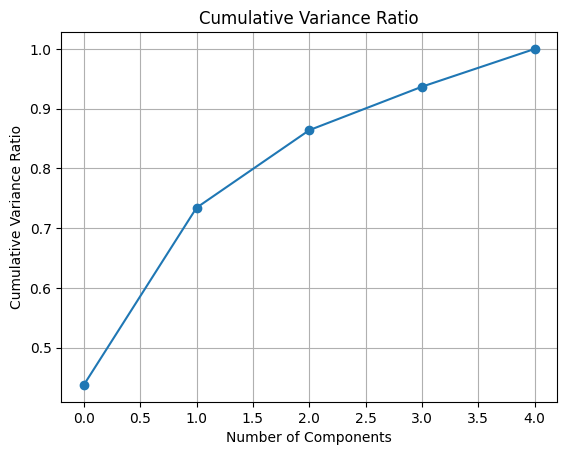

In [29]:
pca_portfolio.plot_variance_ratio()

Now, let us examine the same type of analysis with a more realistic portfolio in terms of portfolio size. Below, we import data for all companies of the Euro Stoxx 50 which includes 50 large companies of the Euro zone. 

In [30]:
import pandas as pd
import yfinance as yf

eu50_tables = pd.read_html("https://en.wikipedia.org/wiki/EURO_STOXX_50")
eu50_constituents = eu50_tables[4]

tickers = eu50_constituents["Ticker"].to_list()

try:
    data =pd.read_csv("../data/stoxx_50.csv", index_col=0)
    data.index = pd.to_datetime(data.index)
except:
    data = yf.download(tickers, start="2024-01-01", end="2024-12-31")["Adj Close"]
    data.to_csv("../data/stoxx_50.csv")

data.ffill(inplace=True)
r_t = data.pct_change().iloc[1:, :]*100

Taking a look how much of the variation is captured by the principal components, we observe that only around 30\% of the variation is captured by the first principal component. While this seems to be not that much, we will see below that this already captures most of the systematic movement of the companies on average. 

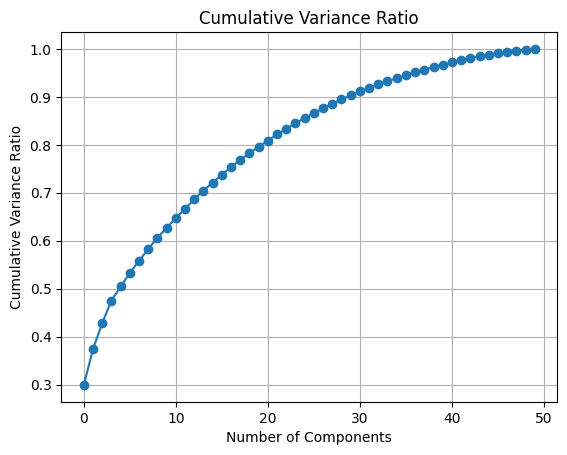

In [31]:
from utils import PcaPortfolio

pca_portfolio = PcaPortfolio(r_t, standardize=True)
pca_portfolio.fit()
pca_portfolio.plot_variance_ratio()

To demonstrate this, we build a naive portfolio of the companies, calculate the scores for the first five principal components and determine the correlation between the scores and the portfolio returns. We can observe that the scores of the first principal component almost perfectly correlate with the portfolio returns, while even the second component scores almost do not correlate anymore. The naive portfolio return is the average market value development of all companies. According to the high correlation, the first principal component almost perfectly captures this average, systematic development.

In [52]:
Z = pca_portfolio.transform(r_t, 5)
Z.columns = [f"PC_{i+1}" for i in range(5)]
r_pf = r_t.mean(axis=1).to_frame("Portfolio")
pd.merge(r_pf, Z, left_index=True, right_index=True).corr()

,Portfolio,PC_1,PC_2,PC_3,PC_4,PC_5
Portfolio,1.000000,9.944973e-01,-7.032176e-02,-8.499983e-03,-2.502608e-02,-1.384320e-02
PC_1,0.994497,1.000000e+00,2.340503e-16,-1.701601e-16,1.421432e-16,4.345851e-16
PC_2,-0.070322,2.340503e-16,1.000000e+00,2.942733e-16,-2.317204e-16,3.201760e-16
PC_3,-0.008500,-1.701601e-16,2.942733e-16,1.000000e+00,6.639647e-16,-3.714232e-16
PC_4,-0.025026,1.421432e-16,-2.317204e-16,6.639647e-16,1.000000e+00,-2.018187e-16
PC_5,-0.013843,4.345851e-16,3.201760e-16,-3.714232e-16,-2.018187e-16,1.000000e+00


We also learned in the small company size example before that the size of the first component weights may provide some insights regarding the risk contribution of individual companies. Below, we take a look at the size of weights in the first principal component by means of a bar chart. As many companies have high and similar weight sizes, it becomes more difficult to extract a few risk driving companies. This would only be reasonable if the distribution of component weights would be less uniform and more centered towards a few companies.

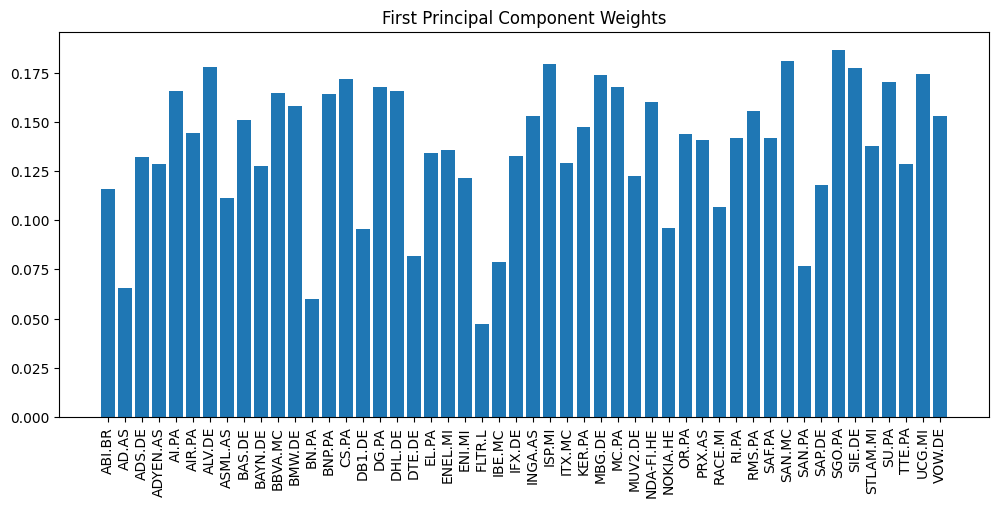

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.bar(x = pca_portfolio.data.columns, height = pca_portfolio.components_[:, 0])
ax.set_title("First Principal Component Weights")
ax.tick_params(axis='x', labelrotation=90)

However, principal components, and, especially the first component are capable to capture the systematic risk in a company universe. The cell below illustrates the rolling average of the past ten observations for the naive portfolio and the first principle components. This highlights that the first component captures the current trend in the market development.

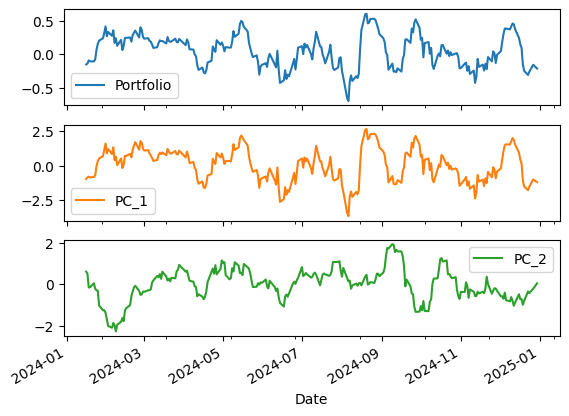

In [36]:
pd.merge(r_pf, Z.iloc[:, :2], left_index=True, right_index=True).rolling(10).mean().plot(subplots=True)
plt.show()

Thus, using the principal components as risk factors is a useful application. In the end of the chapter about linear regression, we already seen risk factor models where the risk factors are constructed by forming portfolios based on firm attributes. These risk factors are hard to build and only publicly available for few countries. Risk factors by PCA can be build easy and flexbile. They only need return data which usually is freely available. Below, we regress each of the Stoxx 50 companies on the first three principal components and build a histogram for the $R^2$ values of these regressions. 

As we can see, the average coefficient of determination is in the range between 40\% and 50\% which tells us that almost half of the variation over time of each return time series can be explained by the risk factors made of PCA.

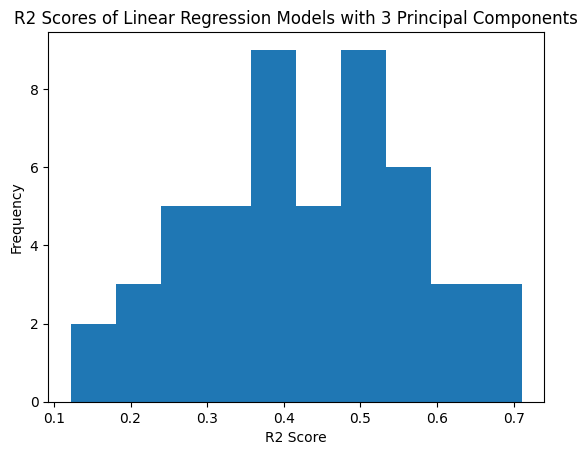

In [40]:
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

Z = pca_portfolio.transform(r_t, 3)

r2_scores = []
for company in r_t.columns:
    lr = LinearRegression()
    lr.fit(Z, r_t[company])
    r2_scores.append(lr.score(Z, r_t[company]))

plt.hist(r2_scores, bins=10)
plt.title("R2 Scores of Linear Regression Models with 3 Principal Components")
plt.xlabel("R2 Score")
plt.ylabel("Frequency")
plt.show()

Note, that these results might be a little too optimistic, if we use the component weights out of sample and out of time. In a more realistic setting, we first estimate the component weights with historic data and use these weights on new and unseen data in the future. Furthermore, the goal is to build universal risk factors which are also good in explaining the variation of returns for companies that are not included in the process of component estimation. 

The out of time aspect is usually less problematic and tackled by a rolling window approach. This means at fixed periods, the weights are updated. For instance, every month, we use the last two years to estimate the weights. As long as the weights do not change drastically within a month, the risk factors with new data should lead to similar levels of explained variation. 

The aspect of universal risk factors is usually driven by regional and sectoral considerations. Empirically, intra-continental correlations are higher than inter-continental correlations. Thus, if we want to find risk factors for European countries, it is better to choose companies from Europe to build the risk factors. Furthermore, the companies we choose should be heterogeneous. 

As an experiment, we collect data for Dax 40 companies and regress them on the first three components of the Stoxx 50. Even though, the average level for the coefficient of determination decreases, the results are sill promising w.r.t. the variation explained.

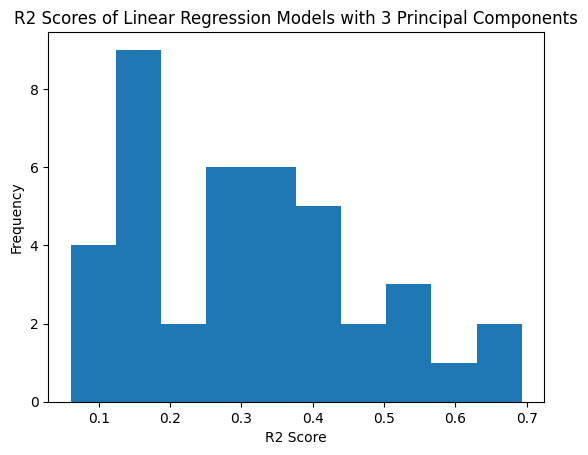

In [57]:
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

tickers = pd.read_html("https://en.wikipedia.org/wiki/DAX#Components")[4].Ticker.to_list()

try:
    data =pd.read_csv("../data/dax_40.csv", index_col=0)
    data.index = pd.to_datetime(data.index)
except:
    data = yf.download(tickers, start="2024-01-01", end="2024-12-31")["Adj Close"]
    data.to_csv("../data/dax_40.csv")

data.ffill(inplace=True)
r_dax = data.pct_change().iloc[1:, :]*100

r2_scores = []
for company in r_dax.columns:
    lr = LinearRegression()
    lr.fit(Z.loc[r_dax.index], r_dax[company])
    r2_scores.append(lr.score(Z.loc[r_dax.index], r_dax[company]))

plt.hist(r2_scores, bins=10)
plt.title("R2 Scores of Linear Regression Models with 3 Principal Components")
plt.xlabel("R2 Score")
plt.ylabel("Frequency")
plt.show()

## Technical notes

These are mathematical notes which are beyond the scope of this course. However, interested readers may find them useful at some point. 

### Notation
Starting point is a mean-centered matrix $X \in \mathbb{R}^{n \times p}$ with $n$ being the number of observations and $p$ being the number of variables. Let us define a *projection* with a vector $\mathbf{w}_j \in \mathbb{R}^p$ by:

$$
\mathbb{z}_j = X \mathbf{w}_j
$$

The vector $\mathbf{w}_j$ is a unit vector which means its length is normalized to one, $ || \mathbf{w}_j || = 1$. As the matrix is mean centered, the covariance matrix is given by:

$$
\Sigma = \frac{1}{n} X^T X
$$

Furthermore, the overall variation in the data is given by:

$$
TSS = \sum_{i = 1}^n \sum_{j = 1}^p x_{ij}^2
$$

The goal of PCA is to create a series of single projections which capture most of $TSS$ in decreasing order. This means $\mathbb{z}_1$ should have the highest variance, $\mathbb{z}_2$ the second highest variance, etc. The projections are called principal component scores the and vectors $\mathbf{w}_j$ are called principal components.

Let us define $SS_j$ as the sum of squared principal component scores. The proportion of the variance in the data which is captured by each of the principal components is defined by:

$$
PSS_j = \frac{SS_j}{TSS} = \frac{\sum_{i=1}^n z_{ij}^2}{\sum_{i = 1}^n \sum_{j = 1}^p x_{ij}^2}
$$

As the first principal component scores have the highest variance, $\sum_{i=1}^n z_{i1}^2$ and $RSS_1$ will be the largest. To determine how much of $TSS$ is captured by the first $q \leq p$ principal components, we can calculate the cumulative proportion of variance by:

$$
CSS_q = \sum_{k=1}^q PSS_j = \frac{\sum_{i=1}^n \sum_{j=1}^q z_{ij}^2}{\sum_{i = 1}^n \sum_{j = 1}^p x_{ij}^2}
$$

### Optimization

The variance of each $\mathbb{z}_j$ is given by:

$$
\sigma_{z_j}^2 = \mathbf{w}_j^T \Sigma \mathbf{w}_j  
$$

with $\Sigma$ being the covariance matrix of X, i.e., 

$$
\Sigma = \frac{1}{n} X^T X
$$

To find the first principal component, we aim to find the vector $\mathbf{w}_1$ that maximizes this variance:

$$
\max_{\mathbf{w}_1} \mathbf{w}_1^T \Sigma \mathbf{w}_1 \quad \text{subject to } \mathbf{w}_1^T \mathbf{w}_1 = 1
$$

This is a constrained optimization problem. To solve it, we use the method of Lagrange multipliers. Define the Lagrangian:

$$
\mathcal{L}(\mathbf{w}_1, \lambda) = \mathbf{w}_1^T \Sigma \mathbf{w}_1 - \lambda (\mathbf{w}_1^T \mathbf{w}_1 - 1)
$$

To find the stationary points, take the derivatives of $ \mathcal{L} $ with respect to  $\mathbf{w}_1$ and $\lambda$, and set them to zero:

1. Derivative with respect to $\mathbf{w}_1$:
   $$
   \frac{\partial \mathcal{L}}{\partial \mathbf{w}_1} = 2\Sigma \mathbf{w}_1 - 2\lambda \mathbf{w}_1 = 0 \quad \Rightarrow \quad \Sigma \mathbf{w}_1 = \lambda \mathbf{w}_1
   $$

   This shows that $\mathbf{w}_1$ must be an eigenvector of $ \Sigma $, and $ \lambda $ is the corresponding eigenvalue, because per definition, if, for a vector $\mathbf{v}$, a matrix $A$ and a scalar $s$ it holds that $A \mathbf{v} = s \mathbf{v}$, $\mathbf{v}$ is an eigenvector and $s$ is its eigenvalue.

2. Derivative with respect to $\lambda$:
   $$
   \frac{\partial \mathcal{L}}{\partial \lambda} = - (\mathbf{w}_1^T \mathbf{w}_1 - 1) = 0 \quad \Rightarrow \quad \mathbf{w}_1^T \mathbf{w}_1 = 1
   $$

For all remaining principal components, the optimization is the same, except that a further condition is orthogonality to the other principal components. For instance, to determine the second principal component, we optimize:

$$
\max_{\mathbf{w}_2} \mathbf{w}_2^T \Sigma \mathbf{w}_2 \quad \text{subject to } \mathbf{w}_2^T \mathbf{w}_2 = 1 \text{ and } \mathbf{w}_2^T \mathbf{w}_1 = 0 
$$

This can be written as a constrained optimization problem. Using the method of Lagrange multipliers, we define the Lagrangian:

$$
\mathcal{L}(\mathbf{w}_2, \lambda, \mu) = \mathbf{w}_2^T \Sigma \mathbf{w}_2 - \lambda (\mathbf{w}_2^T \mathbf{w}_2 - 1) - \mu (\mathbf{w}_2^T \mathbf{w}_1)
$$

To find the stationary points, take the derivatives of $ \mathcal{L} $ with respect to  $\mathbf{w}_2$ and $\lambda$ and $\mu$, and set them to zero:

1. Derivative with respect to $\mathbf{w}_2$:
    $$
    \frac{\partial \mathcal{L}}{\partial \mathbf{w}_2} = 2\Sigma \mathbf{w}_2 - 2\lambda \mathbf{w}_2 - \mu \mathbf{w}_1 = 0
    $$

    Rearranging gives:

    $$
    \Sigma \mathbf{w}_2 = \lambda \mathbf{w}_2 + \frac{\mu}{2} \mathbf{w}_1
    $$

2. Derivative with respect to $\lambda$:
    $$
    \frac{\partial \mathcal{L}}{\partial \lambda} = - (\mathbf{w}_2^T \mathbf{w}_2 - 1) = 0 \quad \Rightarrow \quad \mathbf{w}_2^T \mathbf{w}_2 = 1
    $$  

3. Derivative with respect to $\mu$:

This shows that the second principal component is again an eigenvector of $\Sigma$. 

### Relation to singular value decomposition

Most packages determine principal components by the singular value decomposition of $X$ instead of the eigenvectors of $\Sigma$. The singular value decomposition of $X$ decomposes it to:

$$
X = U \Sigma_s V^T
$$

with

* $U \in \mathbb{R}^{n \times n}$ containing the left singular vectors
* $\Sigma_s \in \mathbb{R}^{p \times p}$ is a diagonal matrix with singular values 
* $V \in \mathbb{R}^{p \times p}$ containing the right singular vectors

$X^T X$ is a scaled version of the covariance matrix, if we replace $X$ with its singular value decomposition, we get:

$$
X^T X = \left( U \Sigma_s V^T \right)^T \left( U \Sigma_s V^T \right) = V \Sigma_s^T \Sigma_s V^T
$$

Given a matrix $A$ and a matrix $Q$ whose columns include all eigenvectors of $A$, the eigenvalue decomposition of A is given by:

$$
A = Q \Lambda Q^T
$$

where $\Lambda$ is a diagonal matrix with the corresponding eigenvalues to the eigenvectors in Q.

This means the right singular values of $X$ are the eigenvectors of $X^T X$ which have the same direction as the eigenvectors of $ \Sigma = \frac{1}{n} X^T X$. Once, they are normalized to unit norm, they are identical to the eigenvectors of the covariance matrix $\Sigma$. The eigenvalues of $\Sigma$ can be determined by singular values by the relationship $\lambda = \frac{s^2}{n}$.
